# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13053287954746886412, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10061896090
 locality {
   bus_id: 1
 }
 incarnation: 5368714136693869239
 physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:43:00.0, compute capability: 6.1"]

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
#DEBUG
print("Training set")
print("Features", X_train.shape)
print("Labels", y_train.shape)
print("Validation set")
print("Features", X_valid.shape)
print("Labels", y_valid.shape)
print("Testing set")
print("Features", X_test.shape)
print("Labels", y_test.shape)

Training set
Features (34799, 32, 32, 3)
Labels (34799,)
Validation set
Features (4410, 32, 32, 3)
Labels (4410,)
Testing set
Features (12630, 32, 32, 3)
Labels (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
# numpy.unique
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random

34799


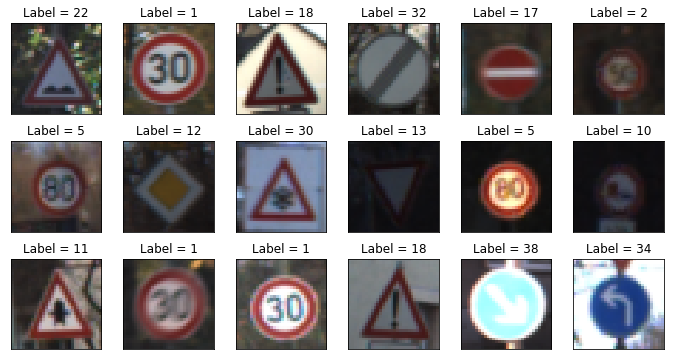

In [6]:
fig, axes = plt.subplots(3, 6, figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.3, wspace=0.05)
axes = axes.ravel()
im_len = len(X_train)
print(im_len)
for i in range(18):
    #Apparently the first 18-20 are roughly the same image... RANDOMIZE!
    rand_index = random.randint(0,im_len)
    image = X_train[rand_index]
    axes[i].imshow(image)
    axes[i].set_title(("Label = "+str(y_train[rand_index])))

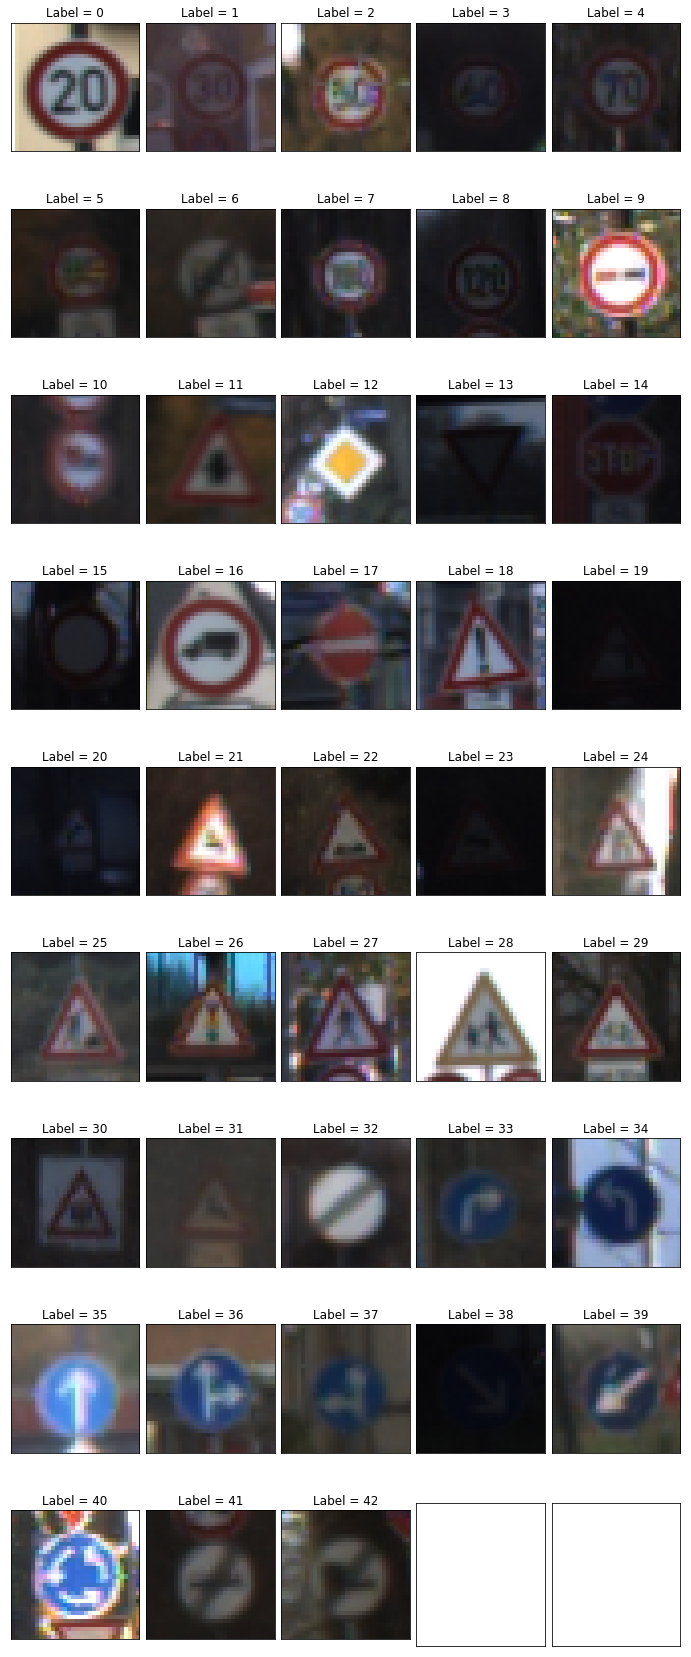

In [6]:
#Now to see how does each image look in each class
#Let me make it into a method.
def disp_label_sample_img(img_set=X_train,labels_set=y_train,cmap=None):
    fig, axes = plt.subplots(9, 5, figsize=(12, 30),
                             subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=0.3, wspace=0.05)
    axes = axes.ravel()
    
    label_set = np.array(labels_set).tolist()
    for i in range(n_classes):
        x_index = label_set.index(i)
        image = img_set[x_index]
        axes[i].imshow(image,cmap=cmap)
        axes[i].set_title(("Label = "+str(label_set[x_index])))

disp_label_sample_img();

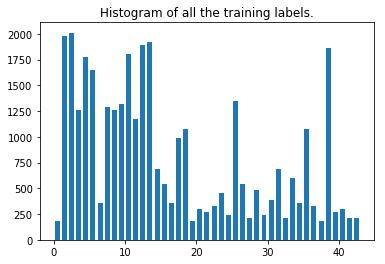

In [7]:
#Now that we have all the images, lets try to get a histogram plot on all the images.
hist,bins = np.histogram(y_train, bins=n_classes)
plt.hist(np.hstack((y_train,n_classes)), bins=n_classes, histtype='bar', rwidth=0.7)
plt.title('Histogram of all the training labels.')
plt.show()

Label 0 = Speed limit (20km/h)
Total count = 180
Random 15 images of the label


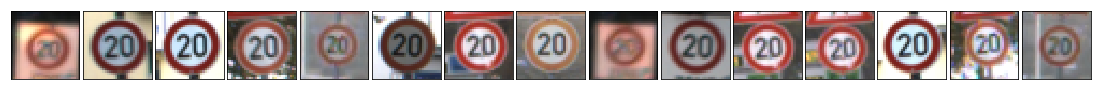

--------------------------------------------------------------------------------------

Label 1 = Speed limit (30km/h)
Total count = 1980
Random 15 images of the label


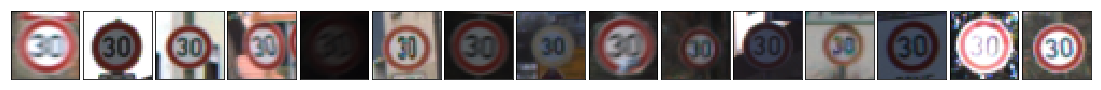

--------------------------------------------------------------------------------------

Label 2 = Speed limit (50km/h)
Total count = 2010
Random 15 images of the label


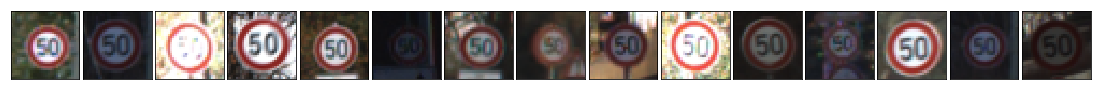

--------------------------------------------------------------------------------------

Label 3 = Speed limit (60km/h)
Total count = 1260
Random 15 images of the label


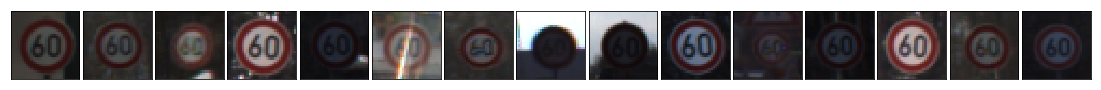

--------------------------------------------------------------------------------------

Label 4 = Speed limit (70km/h)
Total count = 1770
Random 15 images of the label


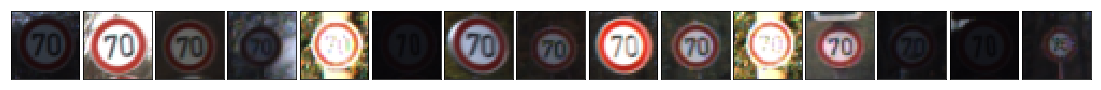

--------------------------------------------------------------------------------------

Label 5 = Speed limit (80km/h)
Total count = 1650
Random 15 images of the label


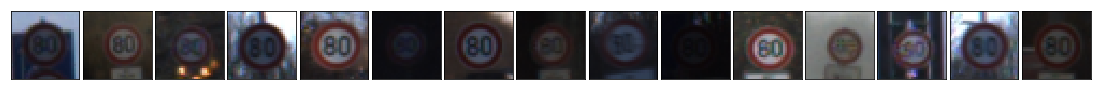

--------------------------------------------------------------------------------------

Label 6 = End of speed limit (80km/h)
Total count = 360
Random 15 images of the label


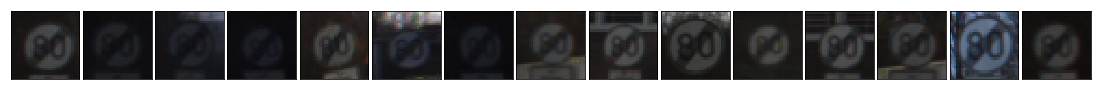

--------------------------------------------------------------------------------------

Label 7 = Speed limit (100km/h)
Total count = 1290
Random 15 images of the label


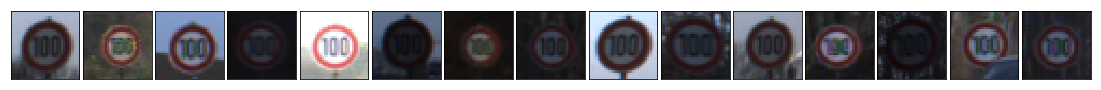

--------------------------------------------------------------------------------------

Label 8 = Speed limit (120km/h)
Total count = 1260
Random 15 images of the label


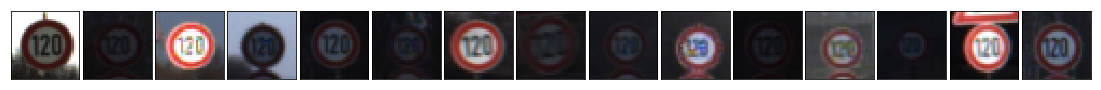

--------------------------------------------------------------------------------------

Label 9 = No passing
Total count = 1320
Random 15 images of the label


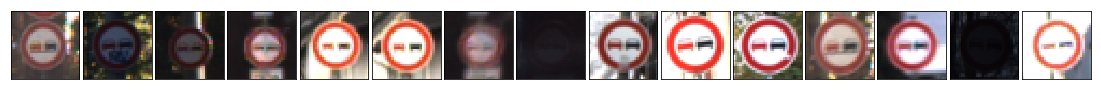

--------------------------------------------------------------------------------------

Label 10 = No passing for vehicles over 3.5 metric tons
Total count = 1800
Random 15 images of the label


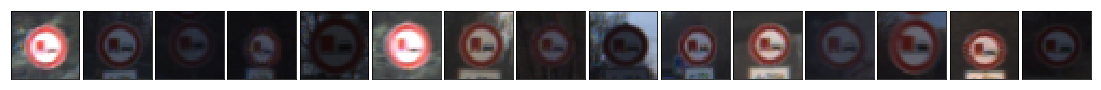

--------------------------------------------------------------------------------------

Label 11 = Right-of-way at the next intersection
Total count = 1170
Random 15 images of the label


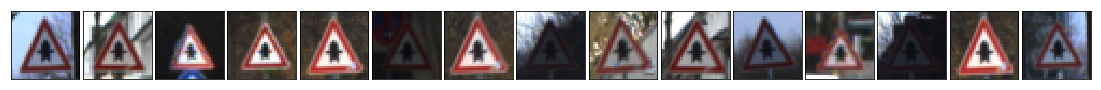

--------------------------------------------------------------------------------------

Label 12 = Priority road
Total count = 1890
Random 15 images of the label


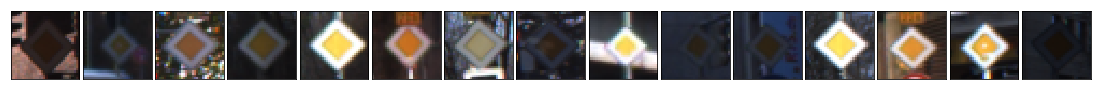

--------------------------------------------------------------------------------------

Label 13 = Yield
Total count = 1920
Random 15 images of the label


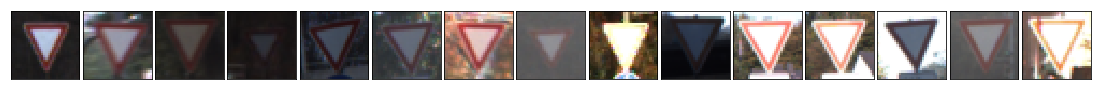

--------------------------------------------------------------------------------------

Label 14 = Stop
Total count = 690
Random 15 images of the label


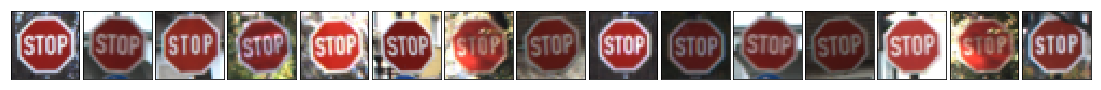

--------------------------------------------------------------------------------------

Label 15 = No vehicles
Total count = 540
Random 15 images of the label


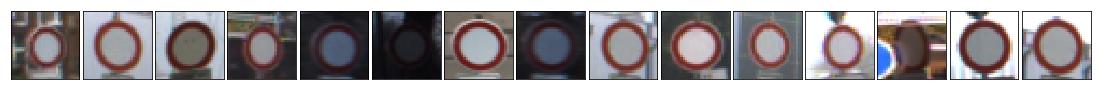

--------------------------------------------------------------------------------------

Label 16 = Vehicles over 3.5 metric tons prohibited
Total count = 360
Random 15 images of the label


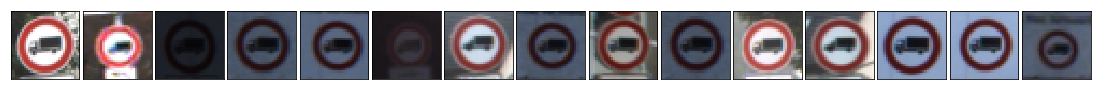

--------------------------------------------------------------------------------------

Label 17 = No entry
Total count = 990
Random 15 images of the label


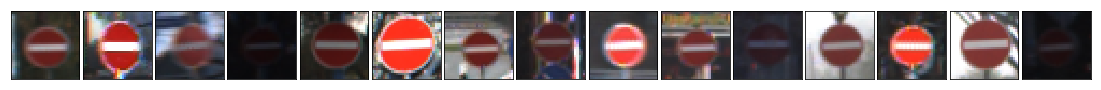

--------------------------------------------------------------------------------------

Label 18 = General caution
Total count = 1080
Random 15 images of the label


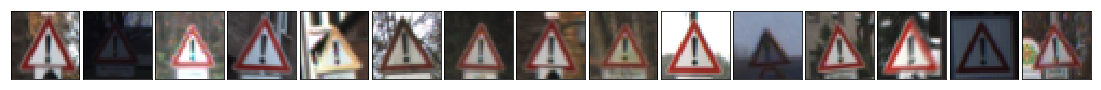

--------------------------------------------------------------------------------------

Label 19 = Dangerous curve to the left
Total count = 180
Random 15 images of the label


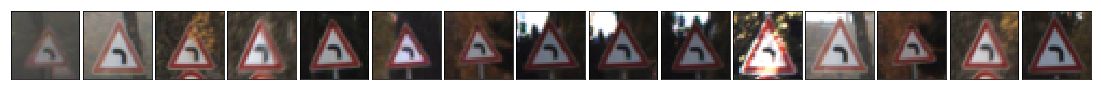

--------------------------------------------------------------------------------------

Label 20 = Dangerous curve to the right
Total count = 300
Random 15 images of the label


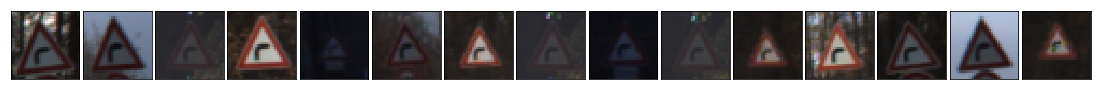

--------------------------------------------------------------------------------------

Label 21 = Double curve
Total count = 270
Random 15 images of the label


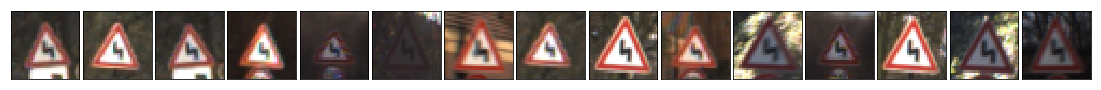

--------------------------------------------------------------------------------------

Label 22 = Bumpy road
Total count = 330
Random 15 images of the label


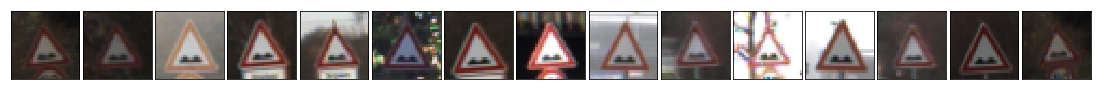

--------------------------------------------------------------------------------------

Label 23 = Slippery road
Total count = 450
Random 15 images of the label


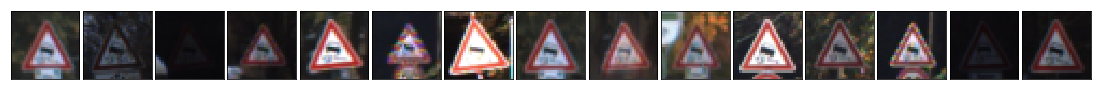

--------------------------------------------------------------------------------------

Label 24 = Road narrows on the right
Total count = 240
Random 15 images of the label


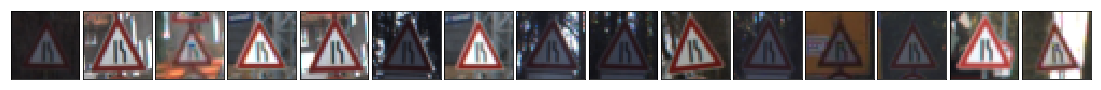

--------------------------------------------------------------------------------------

Label 25 = Road work
Total count = 1350
Random 15 images of the label


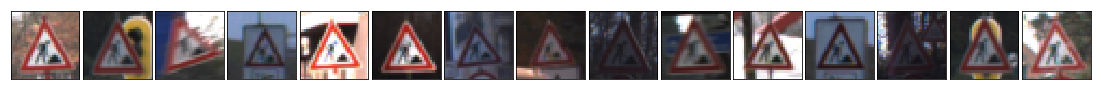

--------------------------------------------------------------------------------------

Label 26 = Traffic signals
Total count = 540
Random 15 images of the label


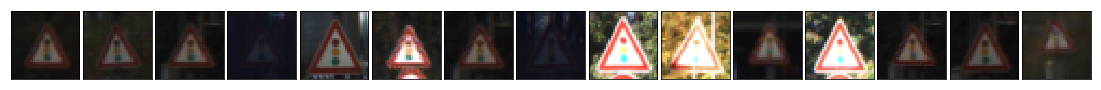

--------------------------------------------------------------------------------------

Label 27 = Pedestrians
Total count = 210
Random 15 images of the label


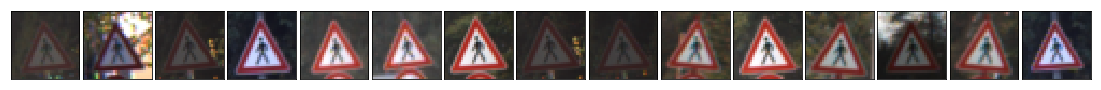

--------------------------------------------------------------------------------------

Label 28 = Children crossing
Total count = 480
Random 15 images of the label


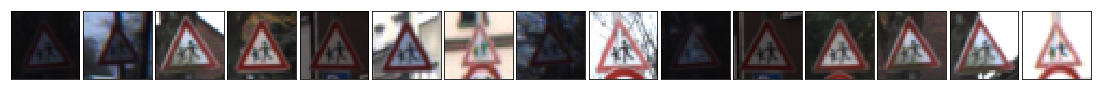

--------------------------------------------------------------------------------------

Label 29 = Bicycles crossing
Total count = 240
Random 15 images of the label


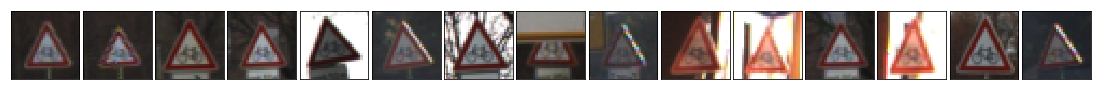

--------------------------------------------------------------------------------------

Label 30 = Beware of ice/snow
Total count = 390
Random 15 images of the label


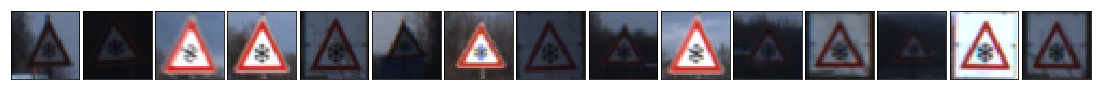

--------------------------------------------------------------------------------------

Label 31 = Wild animals crossing
Total count = 690
Random 15 images of the label


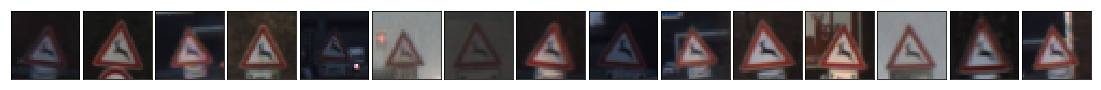

--------------------------------------------------------------------------------------

Label 32 = End of all speed and passing limits
Total count = 210
Random 15 images of the label


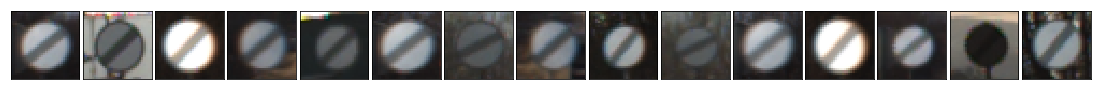

--------------------------------------------------------------------------------------

Label 33 = Turn right ahead
Total count = 599
Random 15 images of the label


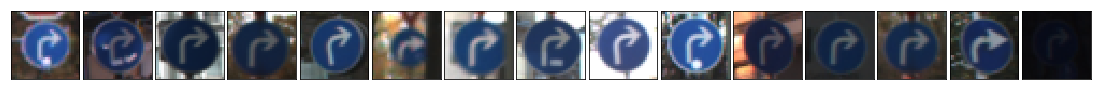

--------------------------------------------------------------------------------------

Label 34 = Turn left ahead
Total count = 360
Random 15 images of the label


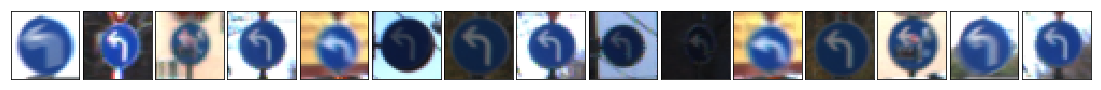

--------------------------------------------------------------------------------------

Label 35 = Ahead only
Total count = 1080
Random 15 images of the label


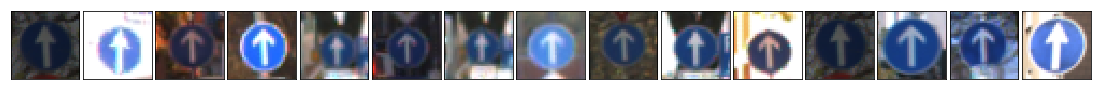

--------------------------------------------------------------------------------------

Label 36 = Go straight or right
Total count = 330
Random 15 images of the label


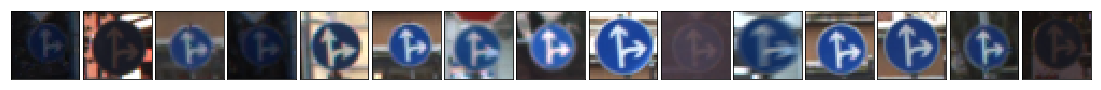

--------------------------------------------------------------------------------------

Label 37 = Go straight or left
Total count = 180
Random 15 images of the label


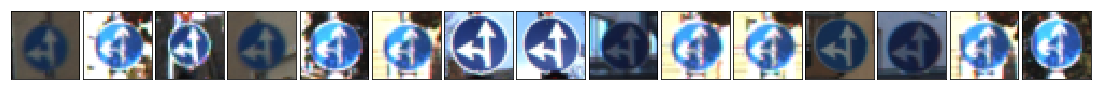

--------------------------------------------------------------------------------------

Label 38 = Keep right
Total count = 1860
Random 15 images of the label


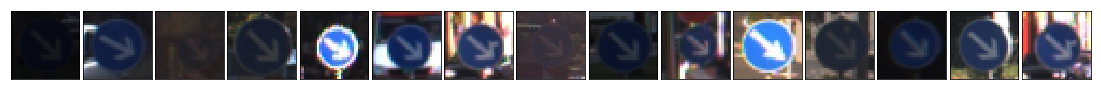

--------------------------------------------------------------------------------------

Label 39 = Keep left
Total count = 270
Random 15 images of the label


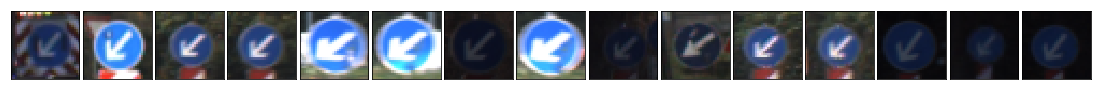

--------------------------------------------------------------------------------------

Label 40 = Roundabout mandatory
Total count = 300
Random 15 images of the label


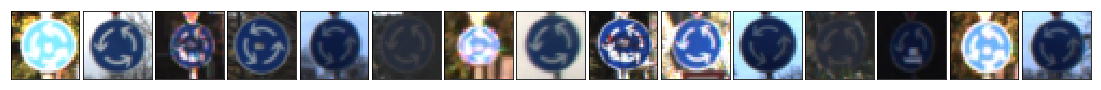

--------------------------------------------------------------------------------------

Label 41 = End of no passing
Total count = 210
Random 15 images of the label


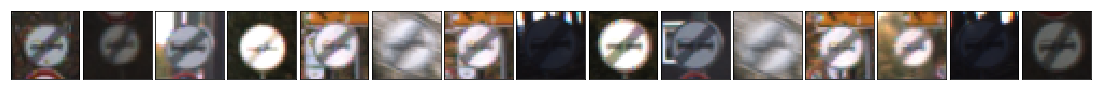

--------------------------------------------------------------------------------------

Label 42 = End of no passing by vehicles over 3.5 metric tons
Total count = 210
Random 15 images of the label


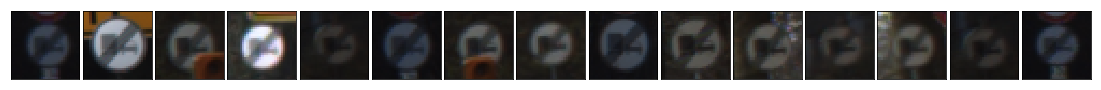

--------------------------------------------------------------------------------------



In [8]:
import pandas as pd

sign_labels = pd.read_csv('./signnames.csv').values[:,1];
sign_labels
sign_label_counts, sign_index, unique_sign_counts = np.unique(y_train, return_index = True, return_counts = True)

col_width = 200 #max(len(name) for name in sign_labels)

for col, col_index, col_count in zip(sign_label_counts, sign_index, unique_sign_counts):
    print("Label {} = {}".format(col,sign_labels[col]))
    print("Total count = {}".format(col_count))
    
    fig = plt.figure(figsize = (15, 5))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.3, wspace = 0.05)
    print("Random 15 images of the label")
    random_indices = random.sample(range(col_index, col_index + col_count), 15)
    for i in range(15):
        axis = fig.add_subplot(1, 15, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    plt.show()
    print("--------------------------------------------------------------------------------------\n")


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Notes:
* I first performed normalization directly on the RBG image and it turned out pretty bad. Forgot that there are 3 channels.
* Better convert to grayscale and then perform normalization. (I guess)
 * Took 30 mins to understand that I needed squeeze() for the greyscale images

In [9]:
#Augment the traffic signs?

In [10]:
# Flipping the images. Google search led me to a previous submission of the project, 
# which I took some "inspiration" from. 
# https://github.com/navoshta/traffic-signs/blob/master/Traffic_Signs_Recognition.ipynb


def extend_by_flipping(images, labels):

    # Classes of signs that, when flipped horizontally, should still be classified as the same class
    can_flip_horizontal = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
    # Classes of signs that, when flipped vertically, should still be classified as the same class
    can_flip_vertical = np.array([1, 5, 12, 15, 17])
    
    
    # Classes of signs that, when flipped horizontally and then vertically, 
    # should still be classified as the same class
    can_flip_both_ways = np.array([32, 40])
    # Classes of signs that, when flipped horizontally, would still be meaningful, 
    # but should be classified as some other class. Left flipped to right and vice versa.
    changes_meaning = np.array([
        [19, 20], 
        [33, 34], 
        [36, 37], 
        [38, 39],
        [20, 19], 
        [34, 33], 
        [37, 36], 
        [39, 38],   
    ])
    num_classes = n_classes #43
    
    images_shape = images.shape
    #Apparently np.empty is a bit faster than np.zeros.
    images_extended = np.empty([0, images_shape[1], images_shape[2], images_shape[3]], dtype = images.dtype)
    labels_extended = np.empty([0], dtype = labels.dtype)
    
    
    for klas in range(num_classes):
        #print(klas)
        
        #fill all images of the current class.
        images_extended = np.append(images_extended, images[labels == klas], axis = 0)
        
        #Same Class
        if klas in can_flip_horizontal:
            images_extended = np.append(images_extended, images[labels == klas][:,:,::-1,:], axis=0)
            labels_extended = np.append(labels_extended, np.full((images_extended.shape[0] - labels_extended.shape[0]), klas, dtype = int))
        elif klas in can_flip_vertical:
            images_extended = np.append(images_extended, images[labels == klas][:,::-1,:,:], axis=0)
            labels_extended = np.append(labels_extended, np.full((images_extended.shape[0] - labels_extended.shape[0]), klas, dtype = int))
        elif klas in can_flip_both_ways:
            images_extended = np.append(images_extended, images[labels == klas][:,::-1,::-1,:], axis=0)
            labels_extended = np.append(labels_extended, np.full((images_extended.shape[0] - labels_extended.shape[0]), klas, dtype = int))
        elif klas in changes_meaning[:, 0]:
            images_extended = np.append(images_extended, images[labels == klas][:,:,::-1,:], axis=0)
            flipped_label = changes_meaning[changes_meaning[:, 0] == klas][0][1]
            labels_extended = np.append(labels_extended, np.full((images_extended.shape[0] - labels_extended.shape[0]), flipped_label, dtype = int))
        else:
            labels_extended = np.append(labels_extended, np.full((images_extended.shape[0] - labels_extended.shape[0]), klas, dtype = int))
    
    return (images_extended, labels_extended)

In [11]:
import cv2
import math
from skimage.transform import rotate
from skimage.transform import warp
from skimage.transform import ProjectiveTransform

def augment_image(image, intensity=0.6):
    

    augmentation_limit = intensity
    
    #aug = image
    
    
    #Rotate
    delta = 30.0 * augmentation_limit
    image = rotate(image, np.random.uniform(-delta,delta), mode = 'edge')
    
    #Inspired from another github code repo.
    #Transform
    image_size = 32
    delta = image_size * 0.2 * augmentation_limit
    tl_top = np.random.uniform(-delta, delta)     # Top left corner, top margin
    tl_left = np.random.uniform(-delta, delta)    # Top left corner, left margin
    bl_bottom = np.random.uniform(-delta, delta)  # Bottom left corner, bottom margin
    bl_left = np.random.uniform(-delta, delta)    # Bottom left corner, left margin
    tr_top = np.random.uniform(-delta, delta)     # Top right corner, top margin
    tr_right = np.random.uniform(-delta, delta)   # Top right corner, right margin
    br_bottom = np.random.uniform(-delta, delta)  # Bottom right corner, bottom margin
    br_right = np.random.uniform(-delta, delta)   # Bottom right corner, right margin
    
    transform = ProjectiveTransform()
    transform.estimate(np.array((
            (tl_left, tl_top),
            (bl_left, image_size - bl_bottom),
            (image_size - br_right, image_size - br_bottom),
            (image_size - tr_right, tr_top)
        )), np.array((
            (0, 0),
            (0, image_size),
            (image_size, image_size),
            (image_size, 0)
        )))
    image = warp(image, transform, output_shape=(image_size, image_size), order = 1, mode = 'edge')
    
    return image
    
    

|----|----|----|----|----|----|----|----|----|----|----|----|-|----|----|----|----|----|----|----|----|---|----|----||----|----|----|----|----||----|----|----|----|----|----|----|----|---|----|----|----|----|----|----|----|----|----|----|----|----|-|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|--|----|----|----|----|----|----|----|----|----|-|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----||----|----|----|----|----||----|----|----|----|----|----|----|----|----|----|----|---|----|----|----|----|----|----|-|----|----|----|----|----|----|----|----|----|----|----||----|----|----|----|----|----|----|----||----|----||----|----|----|----|----|----|----|----|----|----|----|---|----|----|----|----||----|----|----|----|----|----|----|----|---|----|----|----|----|----|----|----|----|----|-|----|----|----|----|----|----|----|----|----|----|----|----|-|----|----|----|----|----|----|----|----|----|----|-

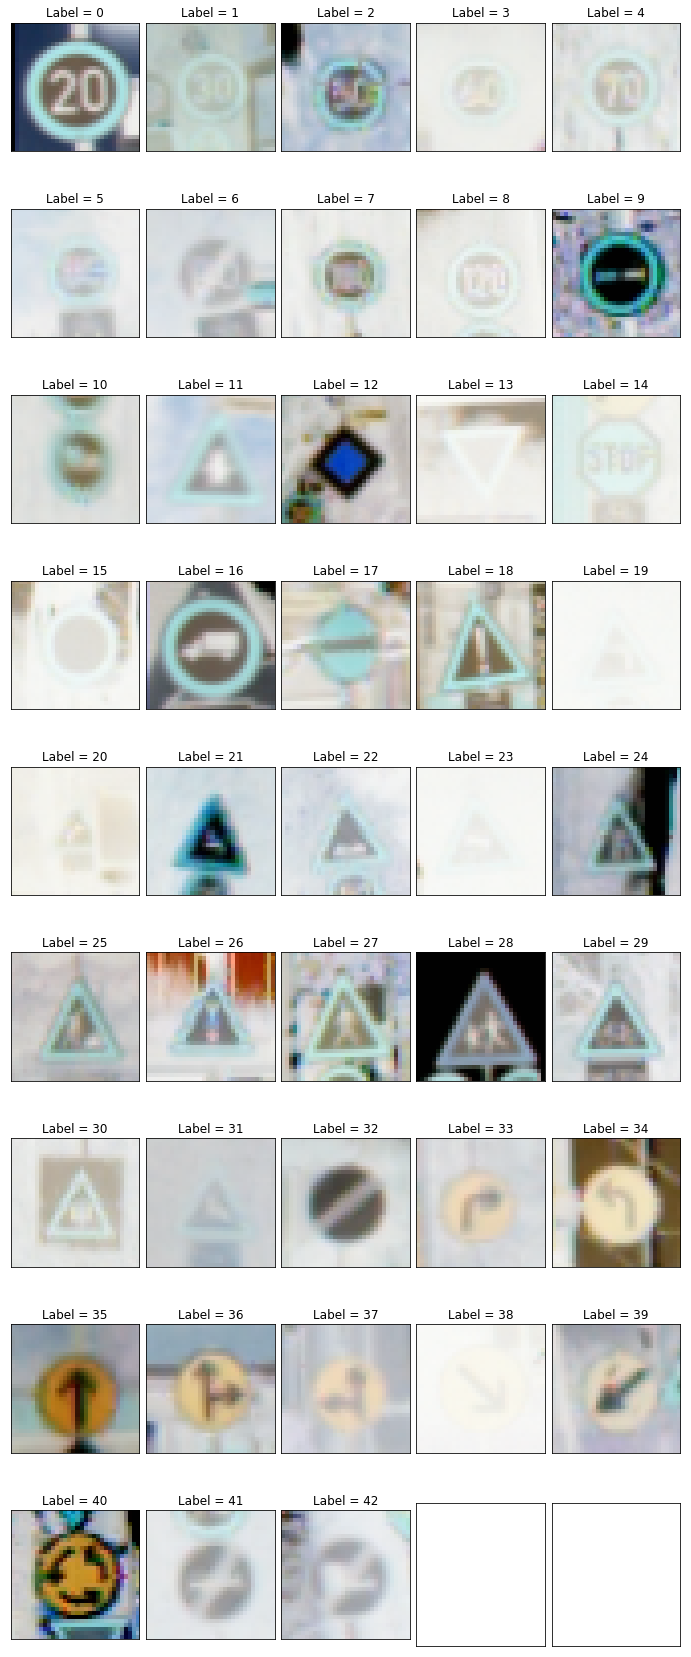

In [12]:
baseline_range = 800
X_train_extend = X_train
y_train_extend = y_train
for klas in range(n_classes):
    klas_images = np.where(y_train_extend == klas)
    klas_img_count = len(klas_images[0])
    if klas_img_count < baseline_range:
        for i in range(baseline_range - klas_img_count):
            temp_img = X_train_extend[klas_images[0][i % klas_img_count]]
            temp_img = augment_image(temp_img)
            X_train_extend = np.concatenate((X_train_extend, [temp_img]), axis = 0)
            y_train_extend = np.concatenate((y_train_extend, [klas]), axis = 0)
            if i % 50 == 0:
                print('|', end='')
            elif i % 10 == 0:
                print('-',end='')

disp_label_sample_img(img_set=X_train_extend, labels_set=y_train_extend)

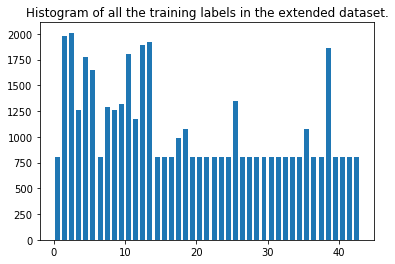

In [13]:
hist,bins = np.histogram(y_train_extend, bins=n_classes)
plt.hist(np.hstack((y_train_extend,n_classes)), bins=n_classes, histtype='bar', rwidth=0.7)
plt.title('Histogram of all the training labels in the extended dataset.')
plt.show()

In [14]:
import pickle

training_extended_balanced_dataset_file = "traffic-signs-data/train-preprocessed-balanced-notExtended.p"
pickle.dump({
        "features" : X_train_extend,
        "labels" : y_train_extend
    }, open(training_extended_balanced_dataset_file, "wb" ) )
print("Preprocessed balanced training dataset saved in", training_extended_balanced_dataset_file)

Preprocessed balanced training dataset saved in traffic-signs-data/train-preprocessed-balanced-notExtended.p


In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def conv_greyscale(imgs):
    #Average method
    #return np.sum(imgs/3, axis=3, keepdims=True)
    #Weighted or luminosity method (https://www.tutorialspoint.com/dip/grayscale_to_rgb_conversion.htm)
    gray = 0.3 * imgs[:,:,:,0] + 0.59 * imgs[:,:,:,1] + 0.11 * imgs[:,:,:,2]
    gray = gray.reshape(gray.shape + (1,)) 
    return gray

# print("Oringal mean = {}".format(np.mean(X_train)))
# #X_grayscale = conv_greyscale(X_train)
# X_grayscale = conv_greyscale(X_train_extend)
# X_train_normalized = (X_grayscale - 128)/128

# print("Greyscale mean = {} ".format(np.mean(X_train_normalized)))

# fig, axes = plt.subplots(9, 5, figsize=(12, 30),
#                              subplot_kw={'xticks': [], 'yticks': []})
# fig.subplots_adjust(hspace=0.3, wspace=0.05)
# axes = axes.ravel()

# label_set = np.array(y_train_extend).tolist()
# #abel_set = np.array(y_train).tolist()
# for i in range(n_classes):
#     x_index = label_set.index(i)
#     image = X_train_normalized[x_index].squeeze()
#     #image = np.expand_dims(image, axis=1)
#     axes[i].imshow(image,cmap='gray')
#     axes[i].set_title(("Label = "+str(label_set[x_index])))

#disp_label_sample_img(img_set=X_grayscale, cmap='gray');

In [ ]:

# X_train_extend, y_train_extend = extend_by_flipping(X_train, y_train)
# print("Extended images length = {}".format(len(X_train_extend)))
# print("Extended lablels length = {}".format(len(y_train_extend)))

# print("Sample images after extending (To cross check)") 
# #Yes, I needed it since I was missing a stupid else condition
# disp_label_sample_img(img_set=X_train_extend, labels_set=y_train_extend)

In [9]:
#training_extended_balanced_dataset_file = "traffic-signs-data/train-preprocessed-balanced.p"
training_extended_balanced_dataset_file = "traffic-signs-data/train-preprocessed-balanced-version2.p"
with open(training_extended_balanced_dataset_file, mode='rb') as f:
    train_extended = pickle.load(f)
X_train, y_train = train_extended['features'], train_extended['labels']

#DEBUG
print("Features", X_train.shape)
print("Labels", y_train.shape)

Features (52828, 32, 32, 3)
Labels (52828,)


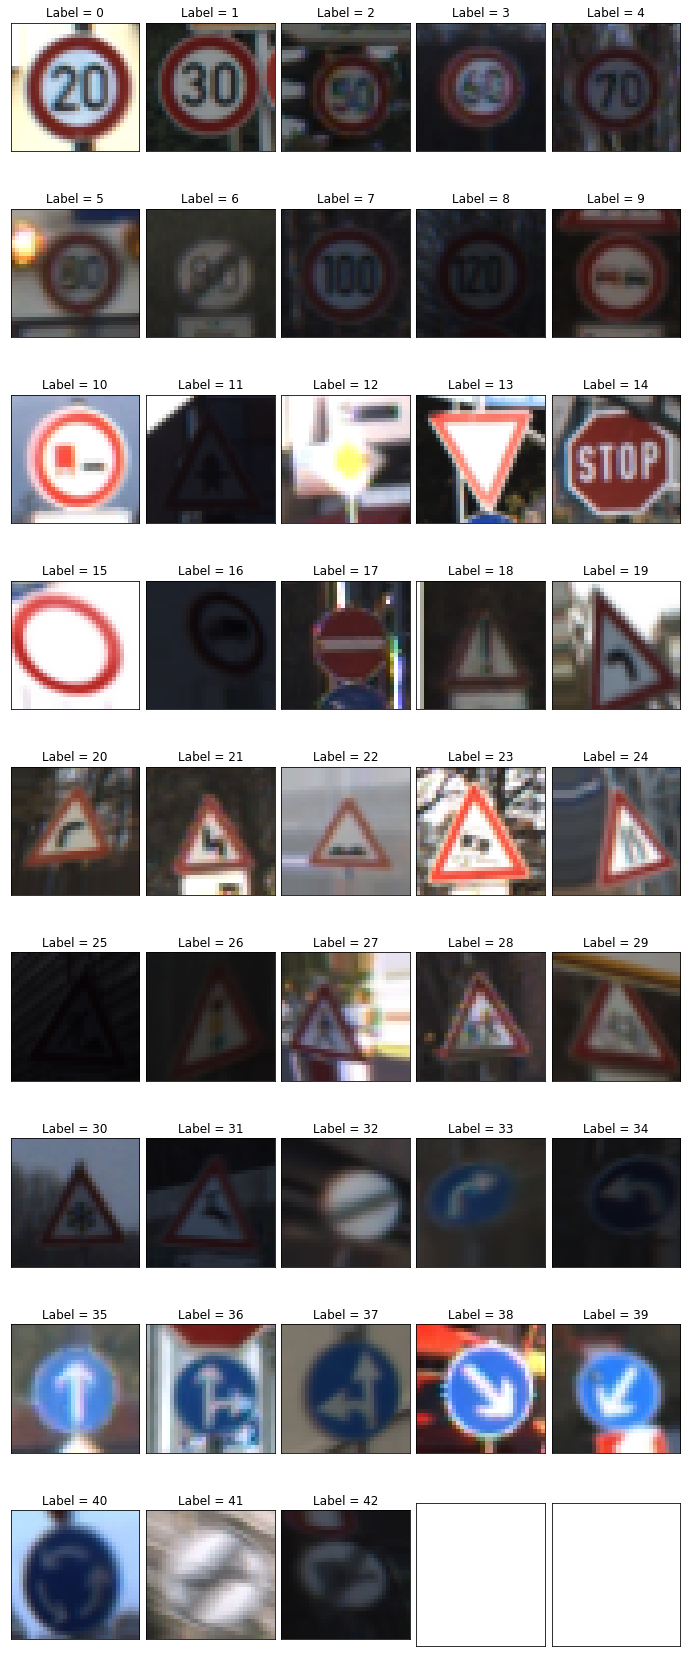

In [52]:
import random

def disp_random_label_sample_img(img_set=X_train,labels_set=y_train,cmap=None):
    fig, axes = plt.subplots(9, 5, figsize=(12, 30),
                             subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=0.3, wspace=0.05)
    axes = axes.ravel()
    
    #label_set = np.array(labels_set).tolist()
    for i in range(n_classes):
        x_indexes = np.where(labels_set == i)
        #print(x_indexes[0])
        x_index = random.choice(x_indexes[0])
        #print(x_index)
        image = img_set[x_index]
        axes[i].imshow(image,cmap=cmap)
        axes[i].set_title(("Label = "+str(labels_set[x_index])))
        
#disp_random_label_sample_img(img_set=X_extended, labels_set=y_extended)
disp_random_label_sample_img(img_set=X_train, labels_set=y_train)

In [53]:
print("Original mean = {}".format(np.mean(X_train)))

Original mean = 0.3270888962720282


In [10]:
X_train_normalized = conv_greyscale(X_train)
X_train_normalized = (X_train_normalized - 128)/128

In [61]:
#X_Validate1 = conv_greyscale(X_valid)
X_Validate1 = (X_valid )/255.0

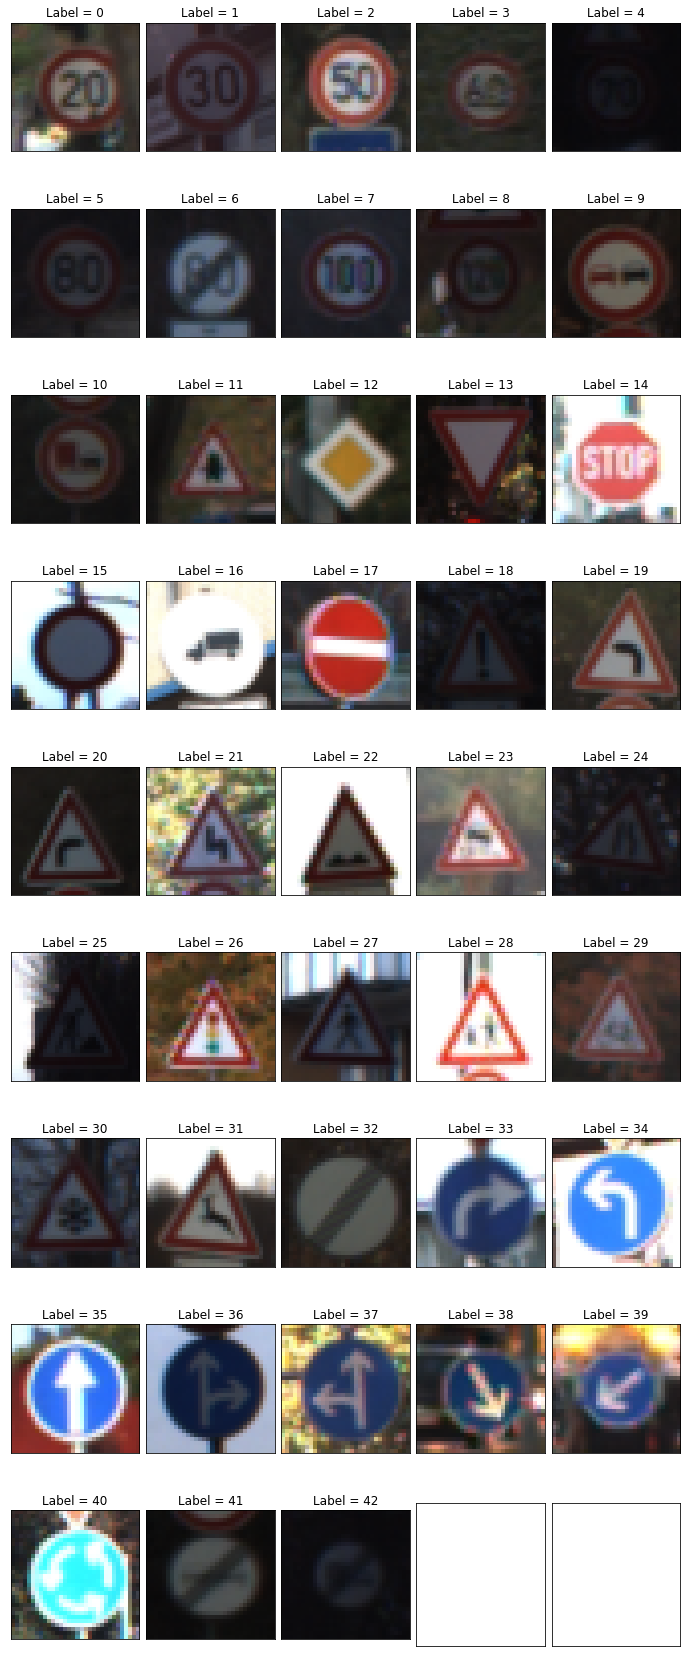

In [62]:
#X_Validate1 = (X_valid)
disp_random_label_sample_img(img_set=X_valid, labels_set=y_valid)

In [63]:
print("Original mean = {}".format(np.mean(X_valid)))

Original mean = 83.55642737563775


In [64]:
X_train1 = X_train

Note: First we need to shuffle the data set and the labels for the training purpose as they are all in sequence

In [65]:
from sklearn.utils import shuffle



Dont run the next cell (except if first run)

In [66]:
X_train1, y_train1 = shuffle(X_train1, y_train)
#X_train1, y_train1 = shuffle(X_train1, y_train_extend)
print("Training images length = {}".format(len(X_train1)))
print("Training labels length = {}".format(len(y_train1)))

Training images length = 52828
Training labels length = 52828


### Model Architecture

In [67]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

Borrowing the LeNet Architecture from the lessons as a beginning benchmark to understand the system better. 

![LeNet Architecture](lenet.png)


In [142]:
import tensorflow as tf
tf.reset_default_graph()

EPOCHS = 200
BATCH_SIZE = 128

In [143]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 32x32x16.
    # out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
    # 28 = (32 - x + 1)/1 (old)
    # Now to try out SAME padding.
    conv_w = tf.Variable(tf.truncated_normal(shape = (5,5,1,16), mean = mu, stddev = sigma))
    conv_b = tf.Variable(tf.zeros(16))
    conv = tf.nn.conv2d(input = x, filter = conv_w, strides = [1,1,1,1], padding = 'SAME') + conv_b

    # TODO: Activation.
    conv = tf.nn.relu(conv)

    # TODO: Pooling. Input = 32x32x16. Output = 16x16x16.
    conv = tf.nn.max_pool(value = conv, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

    # Now to try out SAME padding.
    # TODO: Layer 2: Convolutional. Output = 16x16x32.
    # 10 = (14 -x + 1)/1(old)
    conv2_w = tf.Variable(tf.truncated_normal(shape = (5,5,16,32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2 = tf.nn.conv2d(input = conv, filter = conv2_w, strides = [1,1,1,1], padding = 'SAME') + conv2_b
    
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 16x16x32. Output = 8x8x32.
    conv2 = tf.nn.max_pool(value = conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    
    #Layer 3: Another Convolution.
    # Output = 8x8x64
    conv3_w = tf.Variable(tf.truncated_normal(shape = (5,5,32,64), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3 = tf.nn.conv2d(input = conv2, filter = conv3_w, strides = [1,1,1,1], padding = 'SAME') + conv3_b
    
    
    # TODO: Activation.
    conv3 = tf.nn.relu(conv3)

    # TODO: Pooling. Input = 8x8x64. Output = 4x4x64.
    conv3 = tf.nn.max_pool(value = conv3, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    
    # TODO: Flatten. Input = 4x4x64. Output = 1024.
    flaten_value = flatten(conv3)
    
#     # TODO: Layer 3: Fully Connected. Input = 2048. Output = 1024.
#     # xW + B
#     fc_W = tf.Variable(tf.truncated_normal(shape = (2048,1024), mean = mu, stddev = sigma))
#     fc_B = tf.Variable(tf.zeros(1024))
#     fc1 = tf.add(tf.matmul(flaten_value, fc_W),fc_B)
    
#     # TODO: Activation.
#     fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 1024. Output = 512.
    fc2_W = tf.Variable(tf.truncated_normal(shape = (1024,512), mean = mu, stddev = sigma))
    fc2_B = tf.Variable(tf.zeros(512))
    fc2 = tf.add(tf.matmul(flaten_value, fc2_W),fc2_B)
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 512. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape = (512,43), mean = mu, stddev = sigma))
    fc3_B = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(fc2, fc3_W),fc3_B)
    
    return logits

In [144]:
from tensorflow.contrib.layers import flatten

def MyNet(x):    
#     # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
#     mu = 0
#     sigma = 0.1
    
#     # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x32.
#     # out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
#     # 28 = (32 - x + 1)/1
#     conv_w = tf.Variable(tf.truncated_normal(shape = (5,5,3,32), mean = mu, stddev = sigma))
#     conv_b = tf.Variable(tf.zeros(32))
#     conv = tf.nn.conv2d(input = x, filter = conv_w, strides = [1,1,1,1], padding = 'VALID') + conv_b

#     # TODO: Activation.
#     conv = tf.nn.relu(conv)

#     # TODO: Pooling. Input = 28x28x32. Output = 14x14x32.
#     conv = tf.nn.max_pool(value = conv, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')

#     print(conv.get_shape().as_list())
#     # TODO: Layer 2: Convolutional. Output = 10x10x64.
#     # 10 = (14 -x + 1)/1 
#     conv2_w = tf.Variable(tf.truncated_normal(shape = (5,5,32,64), mean = mu, stddev = sigma))
#     conv2_b = tf.Variable(tf.zeros(64))
#     conv2 = tf.nn.conv2d(input = conv, filter = conv2_w, strides = [1,1,1,1], padding = 'VALID') + conv2_b
    
    
#     # TODO: Activation.
#     conv2 = tf.nn.relu(conv2)

#     # TODO: Pooling. Input = 10x10x64. Output = 5x5x64.
#     conv2 = tf.nn.max_pool(value = conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')

#     # TODO: Flatten. Input = 5x5x64. Output = 1600.
#     flaten_value = tf.concat([flatten(conv),flatten(conv2)],1)
    
#     # TODO: Layer 3: Fully Connected. Input = 7872. Output = 1024.
#     # xW + B
#     fc_W = tf.Variable(tf.truncated_normal(shape = (7872,1024), mean = mu, stddev = sigma))
#     fc_B = tf.Variable(tf.zeros(1024))
#     fc1 = tf.add(tf.matmul(flaten_value, fc_W),fc_B)
    
#     # TODO: Activation.
#     fc1 = tf.nn.relu(fc1)

# #     # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
# #     fc2_W = tf.Variable(tf.truncated_normal(shape = (120,84), mean = mu, stddev = sigma))
# #     fc2_B = tf.Variable(tf.zeros(84))
# #     fc2 = tf.add(tf.matmul(fc1, fc2_W),fc2_B)
    
# #     # TODO: Activation.
# #     fc2 = tf.nn.relu(fc2)

#     # TODO: Layer 5: Fully Connected. Input = 1024. Output = 43.
#     fc3_W = tf.Variable(tf.truncated_normal(shape = (1024,43), mean = mu, stddev = sigma))
#     fc3_B = tf.Variable(tf.zeros(43))
#     logits = tf.add(tf.matmul(fc1, fc3_W),fc3_B)
    
#     return logits  
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
    # 28 = (32 - x + 1)/1
    conv_w = tf.Variable(tf.truncated_normal(shape = (5,5,3,32), mean = mu, stddev = sigma))
    conv_b = tf.Variable(tf.zeros(32))
    conv = tf.nn.conv2d(input = x, filter = conv_w, strides = [1,1,1,1], padding = 'SAME') + conv_b

    # TODO: Activation.
    conv = tf.nn.relu(conv)

    # TODO: Pooling. Input = 28x28x32. Output = 14x14x32.
    conv = tf.nn.max_pool(value = conv, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    #DropOut layer
    conv = tf.nn.dropout(conv, keep_prob = tf.Variable(0.9))

    # TODO: Layer 2: Convolutional. Output = 16x16x64.
    # 10 = (14 -x + 1)/1 
    conv2_w = tf.Variable(tf.truncated_normal(shape = (5,5,32,64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2 = tf.nn.conv2d(input = conv, filter = conv2_w, strides = [1,1,1,1], padding = 'SAME') + conv2_b
    
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x64. Output = 5x5x64.
    conv2 = tf.nn.max_pool(value = conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    #DropOut Layer
    conv2 = tf.nn.dropout(conv2, keep_prob = tf.Variable(0.8))    
    
    #Layer 3: Another Convolution.
    # Output = 8x8x64
    conv3_w = tf.Variable(tf.truncated_normal(shape = (5,5,64,128), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(128))
    conv3 = tf.nn.conv2d(input = conv2, filter = conv3_w, strides = [1,1,1,1], padding = 'SAME') + conv3_b
    
    
    # TODO: Activation.
    conv3 = tf.nn.relu(conv3)

    # TODO: Pooling. Input = 8x8x128. Output = 4x4x128.
    conv3 = tf.nn.max_pool(value = conv3, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    #DropOut Layer
    conv3 = tf.nn.dropout(conv3, keep_prob = tf.Variable(0.7))    
    

    # TODO: Flatten. Input = 5x5x64. Output = 1600.
    # 4x4x128
    
    flaten_value = flatten(conv3)
    
    # TODO: Layer 3: Fully Connected. Input = 2048. Output = 1024.
    # xW + B
    fc_W = tf.Variable(tf.truncated_normal(shape = (2048,1024), mean = mu, stddev = sigma))
    fc_B = tf.Variable(tf.zeros(1024))
    fc1 = tf.add(tf.matmul(flaten_value, fc_W),fc_B)
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    
    #TODO Add another Dropout layer.
    #fc1 = tf.nn.dropout(fc1, keep_prob = tf.Variable(0.5))

#     # TODO: Layer 4: Fully Connected. Input = 1024. Output = 512.
#     fc2_W = tf.Variable(tf.truncated_normal(shape = (1024,512), mean = mu, stddev = sigma))
#     fc2_B = tf.Variable(tf.zeros(512))
#     fc2 = tf.add(tf.matmul(fc1, fc2_W),fc2_B)
    
#     # TODO: Activation.
#     fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 512. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape = (1024,43), mean = mu, stddev = sigma))
    fc3_B = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(fc1, fc3_W),fc3_B)
    
    return logits

#### Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.


In [145]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [146]:
rate = 0.0005

logits = MyNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


#### Model Evaluation

Evaluate how well the loss and accuracy of the model for a given dataset.

In [147]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [148]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

### Training

#### Training Log

##### Trial 1
Default LeNet with same values as the LeNet lab:

    BatchSize = 128
    Epochs = 10
    rate = 0.001
    mu = 0
    sigma = 0.1
    
Validation Accuracy = 0.892

##### Trial 2

    BatchSize = 128
    Epochs = 50
    rate = 0.0009
    mu = 0
    sigma = 0.1
Validation Accuracy = 0.935


##### Trial 3

    BatchSize = 256
    Epochs = 50
    rate = 0.0009
    mu = 0
    sigma = 0.1
Validation Accuracy = 0.930


##### Trial 4

    BatchSize = 128
    Epochs = 50
    rate = 0.001
    mu = 0
    sigma = 0.1
Validation Accuracy = 0.913
Values bounce all around. Max hit 0.917

##### Trial 5

    BatchSize = 256
    Epochs = 100
    rate = 0.0009
    mu = 0
    sigma = 0.1
Validation Accuracy = 0.932

Time to udpate the Trainer.

#### LeNet v2
* Layer 1: Conv 16@28x28; MaxPool
* Layer 2: Conv 32@10,10; MaxPool
* Flatten and 3 layers of Fully Connected layers.

##### Trial 6

    BatchSize = 128
    Epochs = 50
    rate = 0.0009
    mu = 0
    sigma = 0.1
Validation Accuracy = 0.960


#### LeNet v3
* Layer 1: Conv 16@32x32 (SAME padding); MaxPool
* Layer 2: Conv 32@16x16 (SAME padding); MaxPool
* Flatten -> 2048. 3 FullyConnected layers

##### Trial 7

    BatchSize = 128
    Epochs = 50
    rate = 0.0009
    mu = 0
    sigma = 0.1
Validation Accuracy = 0.927

#### LeNet v4
* Layer 1: Conv 16@32x32 (SAME padding); MaxPool
* Layer 2: Conv 32@16x16 (SAME padding); MaxPool
* Layer 3: Conv 64@8x8 (SAME padding); MaxPool
* Flatten -> 1024. 2 Fully connected layers

##### Trial 8

    BatchSize = 128
    Epochs = 50
    rate = 0.0009
    mu = 0
    sigma = 0.1
Validation Accuracy = 0.912

##### Trial 8

    BatchSize = 128
    Epochs = 50
    rate = 0.0005
    mu = 0
    sigma = 0.1
    
Validation Accuracy = 0.907

##### Trial 9

    BatchSize = 256
    Epochs = 200
    rate = 0.0005
    mu = 0
    sigma = 0.1
    
Validation Accuracy = 0.891

##### Trial 9

    BatchSize = 256
    Epochs = 200
    rate = 0.0001
    mu = 0
    sigma = 0.1
Validation Accuracy = 0.844 (That looks a lot worse than LeNet original)

##### Trial 10

    BatchSize = 256
    Epochs = 200
    rate = 0.001
    mu = 0
    sigma = 0.1
    
Validation Accuracy = 0.914

#### MyNet v1
* Layer 1: Conv 32@28x28;VALID padding; MaxPool
* Layer 2: Conv 64@10,10;VALID padding; MaxPool
* Flatten => 1600
* 2 Fully connected layers

##### Trial 11

    BatchSize = 256
    Epochs = 200
    rate = 0.001
    mu = 0
    sigma = 0.1

Validation Accuracy = 0.955

##### Trial 12

    BatchSize = 256
    Epochs = 1000
    rate = 0.0001
    mu = 0
    sigma = 0.1
EPOCH 1000 ...
Validation Accuracy = 0.931


At this point, it looks like I need to add more "jitter" into the training set. Also I need to look into adding a dropout layer and possibly a L2 Regularization layer into the training set. 

One other possible training improvement that I can look into is to append/concatenate the flattened layer from all the outputs of the previous layers. This is something that was mentioned in the Deep Neural Networks and Convolutional Neural Networks lectures. 


#### MyNet v2
* Layer 1: Conv 32@28x28;VALID padding; MaxPool
* Layer 2: Conv 64@10,10;VALID padding; MaxPool
* Flatten Layer 1 + Layer2 => 7872
* 2 Fully connected layers

##### Trial 13

    BatchSize = 128
    Epochs = 200
    rate = 0.0001
    mu = 0
    sigma = 0.1
EPOCH 200 ...
Validation Accuracy = 0.919


##### Trial 14
Modified the way grayscale images were being generated. Used a Luminosity method.

    BatchSize = 128
    Epochs = 200
    rate = 0.0008
    mu = 0
    sigma = 0.1
EPOCH 200 ...
Validation Accuracy = 0.956


Nearly doubled the training data set by adding augmentation through flipped images. So, this may actually take a lot more time given the increase in the training time. 

##### Trial 15
    BatchSize = 128
    Epochs = 200
    rate = 0.0008
    mu = 0
    sigma = 0.1
EPOCH 200 ...
Validation Accuracy = 0.832

##### Trial 16
    BatchSize = 128
    Epochs = 100
    rate = 0.001
    mu = 0
    sigma = 0.1
EPOCH 100 ...
Validation Accuracy = 0.825 (Was at 0.840 and fell down)
Took 259.2907658689983 seconds to complete


Lets try reverting to original LeNet and see how things work...

##### Trial 17 (Original Lenet)
    BatchSize = 128
    Epochs = 10
    rate = 0.001
    mu = 0
    sigma = 0.1
EPOCH 10 ...
Validation Accuracy = 0.805. 
Took 12.202859160999651 seconds to complete

##### Trial 20 (Original Lenet)
    BatchSize = 128
    Epochs = 100
    rate = 0.001
    mu = 0
    sigma = 0.1
EPOCH 100 ...
Validation Accuracy = 0.812. 
Took 119.909685335002 seconds to complete


#### MyNet v3
Once again modified MyNet.
* Layer 1: Conv 64@28x28;VALID padding; MaxPool
* Layer 2: Conv 128@10,10;VALID padding; MaxPool
* Flatten Layer 2: 3200 depth.
* 3 Fully Connected: 3200 -> 1024 -> 512 -> 43

##### Trial 21
    BatchSize = 128
    Epochs = 100
    rate = 0.001
    mu = 0
    sigma = 0.1
EPOCH 100 ...
Validation Accuracy = 0.841. 
Took 311.2645704099996 seconds to complete

##### Trial 22
    BatchSize = 128
    Epochs = 100
    rate = 0.0001
    mu = 0
    sigma = 0.1

In [ ]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9775047404666368048, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 208207872
 locality {
   bus_id: 1
 }
 incarnation: 16354102359897014077
 physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:43:00.0, compute capability: 6.1"]

In [ ]:
from timeit import default_timer as timer

start_time = timer()
#with tf.device('/device:GPU:1'):
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train1)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train1, y_train1 = shuffle(X_train1, y_train1)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train1[offset:end], y_train1[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        #training_accuracy = evaluate(X_train1, y_train1)
        validation_accuracy = evaluate(X_Validate1, y_valid)
        print("EPOCH {} ...".format(i+1))
        #print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    print("Final:")
    training_accuracy = evaluate(X_train1, y_train1)
    validation_accuracy = evaluate(X_Validate1, y_valid)
    print("Training Accuracy = {:.3f}. ".format(training_accuracy))
    print("Validation Accuracy = {:.3f}. ".format(validation_accuracy))
        
    saver.save(sess, './lenetv2')
    print("Model saved")
    end_time = timer()
    
    print("Took {} seconds to complete".format(end_time-start_time))

Training...

EPOCH 1 ...
Validation Accuracy = 0.488

EPOCH 2 ...
Validation Accuracy = 0.636

EPOCH 3 ...
Validation Accuracy = 0.721

EPOCH 4 ...
Validation Accuracy = 0.742

EPOCH 5 ...
Validation Accuracy = 0.776

EPOCH 6 ...
Validation Accuracy = 0.785

EPOCH 7 ...
Validation Accuracy = 0.806

EPOCH 8 ...
Validation Accuracy = 0.822

EPOCH 9 ...
Validation Accuracy = 0.828

EPOCH 10 ...
Validation Accuracy = 0.820

EPOCH 11 ...
Validation Accuracy = 0.837

EPOCH 12 ...
Validation Accuracy = 0.839

EPOCH 13 ...
Validation Accuracy = 0.846

EPOCH 14 ...
Validation Accuracy = 0.849

EPOCH 15 ...
Validation Accuracy = 0.846

EPOCH 16 ...
Validation Accuracy = 0.859

EPOCH 17 ...
Validation Accuracy = 0.856

EPOCH 18 ...
Validation Accuracy = 0.834

EPOCH 19 ...
Validation Accuracy = 0.849

EPOCH 20 ...
Validation Accuracy = 0.866

EPOCH 21 ...
Validation Accuracy = 0.871

EPOCH 22 ...
Validation Accuracy = 0.867

EPOCH 23 ...
Validation Accuracy = 0.874

EPOCH 24 ...
Validation Accura

#### Training log

#### MyNet v11
Trying a dropout layer:
* Layer 1: Conv 32@32x32;SAME padding; MaxPool; drop keep% = 0.9
* Layer 2: Conv 64@16,16;SAME padding; MaxPool; drop keep% = 0.8
* Layer 3: Conv 128@8,8;SAME padding; MaxPool; drop keep% = 0.7
* Flatten Layer 2: 2048 depth.
* 2 Fully Connected: 2048 -> 1024 -> 43

##### Trial 45 (color)
    BatchSize = 128
    Epochs = 200
    rate = 0.001
    mu = 0
    sigma = 0.1
Training Accuracy = 0.999. 
Validation Accuracy = 0.943. 
Took 801.5446842169995 seconds to complete

##### Trial 47 (color)
    BatchSize = 128
    Epochs = 200
    rate = 0.0005
    mu = 0
    sigma = 0.1
    
Training Accuracy = 1.000. 
Validation Accuracy = 0.955. 
Model saved
Took 795.9388178720001 seconds to complete

##### Trial 48 (color)
    BatchSize = 128
    Epochs = 200
    rate = 0.0001
    mu = 0
    sigma = 0.1
Training Accuracy = 0.992. 
Validation Accuracy = 0.889. 
Model saved
Took 829.0157623779996 seconds to complete

The Testing phase

In [113]:
# X_test_grayscale = conv_greyscale(X_test)
# X_test_normalized = (X_test_grayscale - 128)/128
X_test_normalized = X_test / 255.0

In [114]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenetv2.meta')
    saver2.restore(sess, "./lenetv2")
    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenetv2
Test Set Accuracy = 0.945


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")